Clear data plots that explicate
the relationship between variables can lead to the creation of newer and better
features that can predict more than the existing ones.Explorative Data Analysis, which can
be effective if it has the following characteristics:

• It should be fast, allowing you to explore, develop new ideas and test them,
and restart with a new exploration and fresh ideas.

• It should be graphic in order to better represent data as a whole, no matter
how high its dimensionality is.

Instead, if your purpose is to best communicate the findings
by using beautiful visualization, you may notice that it is not so easy to customize
the pandas graphical outputs. Therefore, when it is paramount to create specific
graphic outputs, it is better to start working directly from the beginning with
matplotlib instructions.

In [5]:
import pandas as pd
%matplotlib inline
print  ('Your pandas version is: %s' % pd.__version__)
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
groups = list(iris.target)
iris_df['groups'] = pd.Series([iris.target_names[k] for k in groups])

Your pandas version is: 0.18.0


## Boxplots and histograms

Distributions should always be the first aspect to be checked in your data.
Boxplots draft the key figures in the distribution and help you spot outliers.

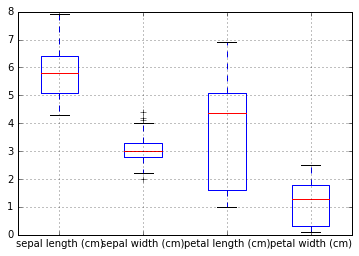

In [8]:
boxplots = iris_df.boxplot(return_type='axes')

If you already have groups in your data (from categorical variables, or they may be
derived from unsupervised learning), just point out the variable for which you need
the boxplot and specify that you need to have the data separated by the groups (use
the by parameter followed by the string name of the grouping variable):

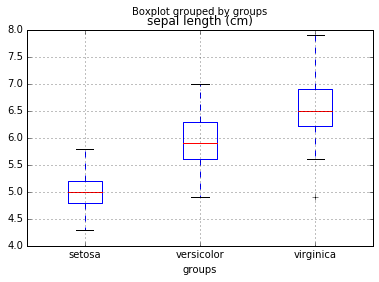

In [7]:
boxplots = iris_df.boxplot(column='sepal length (cm)', by='groups', return_type='axes')

In this way, you can quickly know whether the variable is a good discriminator of
the group differences. 

Anyway, Boxplots cannot provide you with a complete view
of distributions as histograms and density plots. For instance, by using histograms
and density plots, you can figure out whether there are distribution peaks or valleys.

You can obtain both histograms and density plots by using the plot method. This
method allows you to represent the whole dataset, specific groups of variables (you
just have to provide a list of the string names and do some fancy indexing), or even
single variables.

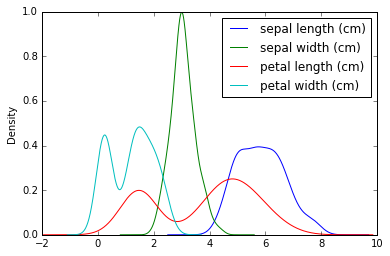

In [10]:
densityplot = iris_df.plot(kind='density')

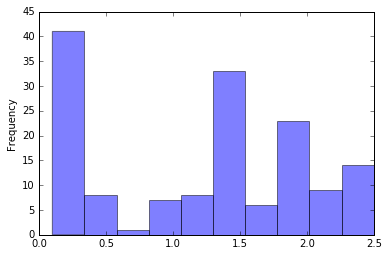

In [11]:
single_distribution = iris_df['petal width (cm)'].plot(kind='hist', alpha=0.5)

## Scatterplots

Scatterplots can be used to effectively understand whether the variables are
in a nonlinear relationship, and you can get an idea about their best possible
transformations to achieve linearization

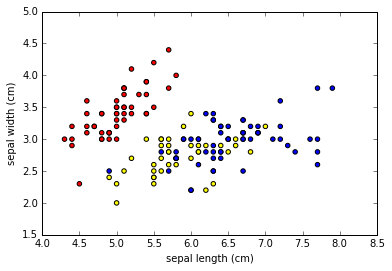

In [12]:
colors_palette = {0: 'red', 1: 'yellow', 2:'blue'}
colors = [colors_palette[c] for c in groups]
simple_scatterplot = iris_df.plot(kind='scatter', x=0, y=1, c=colors)

Scatterplots can be turned into hexagonal binning plots. Also, they help you
effectively visualize the point densities, thus revealing natural clusters hidden in
your data by using some of the variables in the dataset or the dimensions obtained
by PCA or other dimensionality reduction algorithm

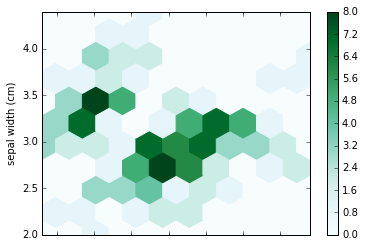

In [13]:
hexbin = iris_df.plot(kind='hexbin', x=0, y=1, gridsize=10)

The scatterplot matrix can inform you about the conjoint distributions of your
features. It thus helps you locate groups in data and verify their separability.

If your variables are less in number (otherwise, the visualization will get cluttered), a
quick turnaround is to automatically place a command to draw a matrix of scatterplots:

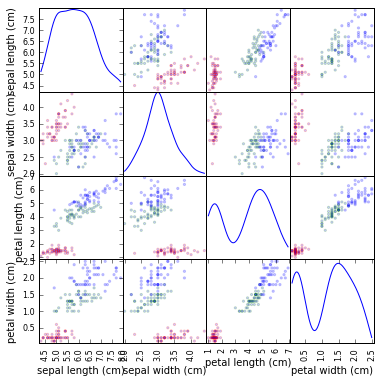

In [14]:
from pandas.tools.plotting import scatter_matrix
colors_palette = {0: "red", 1: "green", 2: "blue"}
colors = [colors_palette[c] for c in groups]   
matrix_of_scatterplots = scatter_matrix(iris_df, alpha=0.2, figsize=(6, 6), color=colors, diagonal='kde')

The alpha parameter controls the amount of transparency, and figsize
provides the width and height of the matrix in inches. Finally, color accepts a list
indicating the color of each point in the plot, thus allowing the depicting of different
groups in data. Also, by selecting 'kde' or 'hist' on your diagonal parameter,
you can opt to represent density curves or histograms (faster) of each variable on
the diagonal of the scatter matrix.

## Parallel coordinates

Parallel coordinates plot is helpful in the task of providing you with a hint about
the most group-discriminating variables.

By plotting all the
observations as parallel lines with respect to all the possible variables (arbitrarily
aligned on the abscissa), parallel coordinates will help you spot whether there are
streams of observations grouped as your classes and understand the variables that
best separate the streams (the most useful predictor variables).

The parallel_coordinates is a pandas function and, to work properly, it just needs
as parameters the data DataFrame and the string name of the variable containing the
groups whose separability you want to test. This is why you should add it to your
dataset. However, don't forget to remove it after you finish exploring by using the
DataFrame.drop('variable name',axis=1) method.

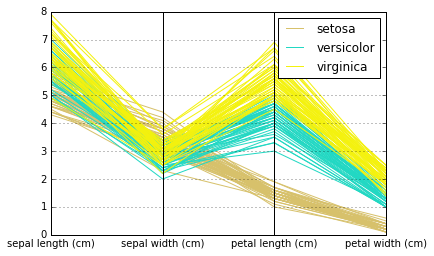

In [15]:
from pandas.tools.plotting import parallel_coordinates
iris_df['groups'] = [iris.target_names[k] for k in groups]
pll = parallel_coordinates(iris_df,'groups')